# Linear & Non Linear Regression Notebook

Notebook to experiment solely with Linear Regression Models

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from __future__ import print_function
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import sklearn as sk
from sklearn.linear_model import LinearRegression

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
master = pd.read_parquet('master.parquet',engine='fastparquet')

In [3]:
master = master.select_dtypes(include=['float64','int64'])

In [4]:
master=master.fillna(0)

In [5]:
X = master.drop('price_y', axis = 1)

In [6]:
y = master['price_y']

Using Stats Models to do Regression - Provides more info than SKlearn in the summary:

In [7]:
X2 = sm.add_constant(X)
X2 = X2.drop(columns=['listing_id','id','scrape_id','host_id','longitude', 'latitude', 'zipcode','has_availability','license'])

In [8]:
est = sm.OLS(y, X2)
est2 = est.fit()

Plotting the Price vs Square Feet

In [9]:
from statsmodels.graphics.regressionplots import plot_fit

In [10]:
mod = sm.OLS(y.head(10000),X2['bedrooms'].head(10000))
results = mod.fit()

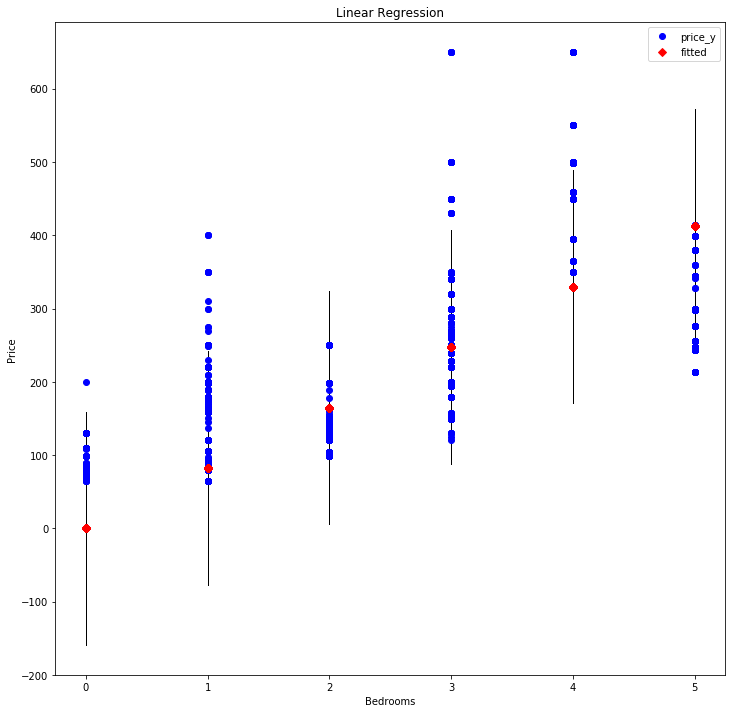

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Price")
ax.set_xlabel("Bedrooms")
ax.set_title("Linear Regression")
plt.show()

In [12]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                price_y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 9.298e+04
Date:                Sat, 03 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:02:33   Log-Likelihood:            -5.6083e+06
No. Observations:              873972   AIC:                         1.122e+07
Df Residuals:                  873942   BIC:                         1.122e+07
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_listings_count            -1.122e+09   2.02e+09     -0.555      0.579   -5.09e+09    2.84e+09
host_total_listings_count       1.122e+09   2.02e+09      0.555      0.579   -2.84e+09    5.09e+09
neighbourhood_group_cleansed   -8.806e-08   1.59e-07     -0.555      0.579   -3.99e-07    2.23e-07
accommodates                      15.0789      0.120    125.358      0.000      14.843      15.315
bathrooms                         -8.2299      0.278    -29.596      0.000      -8.775      -7.685
bedrooms                          33.4484      0.266    125.894      0.000      32.928      33.969
beds                              -0.0462      0.168     -0.274      0.784      -0.376       0.284
square_feet                        0.0458      0.001     56.434      0.000       0.044       0.047
guests_included                    3.4047      0.081     41.969      0.000       3.246       3.564
minimum_nights                    -0.9708      0.021    -45.820      0.000      -1.012      -0.929
maximum_nights                 -6.522e-05   7.79e-06     -8.368      0.000   -8.05e-05   -4.99e-05
availability_30                   -0.1244      0.040     -3.144      0.002      -0.202      -0.047
availability_60                    0.7160      0.038     18.696      0.000       0.641       0.791
availability_90                   -0.2611      0.022    -11.720      0.000      -0.305      -0.217
availability_365                  -0.0206      0.002     -8.297      0.000      -0.025      -0.016
number_of_reviews                 -0.1720      0.007    -24.902      0.000      -0.186      -0.158
review_scores_rating               0.4487      0.034     13.247      0.000       0.382       0.515
review_scores_accuracy             7.9512      0.301     26.429      0.000       7.362       8.541
review_scores_cleanliness          4.9091      0.275     17.883      0.000       4.371       5.447
review_scores_checkin            -22.4358      0.352    -63.711      0.000     -23.126     -21.746
review_scores_communication       -1.3302      0.321     -4.150      0.000      -1.958      -0.702
review_scores_location             8.4248      0.256     32.947      0.000       7.924       8.926
review_scores_value               -3.5534      0.312    -11.407      0.000      -4.164      -2.943
calculated_host_listings_count     0.5237      0.011     48.846      0.000       0.503       0.545
reviews_per_month                 -7.9738      0.136    -58.569      0.000      -8.241      -7.707
transit_length                     0.1309      0.009     14.172      0.000       0.113       0.149
transit_variety                    1.1636      0.199      5.848      0.000       0.774       1.554
transit_vocab_size                -0.4825      0.024    -20.320      0.000      -0.529      -0.436
transitTextLen

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.
Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

Based on the above summary, we would eliminate only the following columns: host_listings_count, host_total_listings_count, beds, neighbourhood_group_cleansed. So we would keep columns in the following list:

In [13]:
manually_excluded = ['listing_id','id','scrape_id','host_id','longitude', 'latitude', 'zipcode','has_availability','license']
exclude = ['host_listings_count', 'host_total_listings_count', 'beds', 'neighbourhood_group_cleansed']
include = [i for i in X.columns if i not in exclude]
final = [i for i in include if i not in manually_excluded]

In [14]:
for i in X[final]:
    print i

accommodates
bathrooms
bedrooms
square_feet
guests_included
minimum_nights
maximum_nights
availability_30
availability_60
availability_90
availability_365
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
calculated_host_listings_count
reviews_per_month
transit_length
transit_variety
transit_vocab_size
transitTextLength
transitTextWordsPerc
transitTextPuncPerc
transitTextDigitsPerc


Analysis of Residuals

Jarque-Bera test:

In [19]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(est2.resid)
lzip(name, test)

[('Jarque-Bera', 837302.2304387874),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.33223436201399587),
 ('Kurtosis', 7.748841844132165)]

Omni test:

In [20]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(est2.resid)
lzip(name, test)

[('Chi^2', 107115.72329904058), ('Two-tail probability', 0.0)]

In [21]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

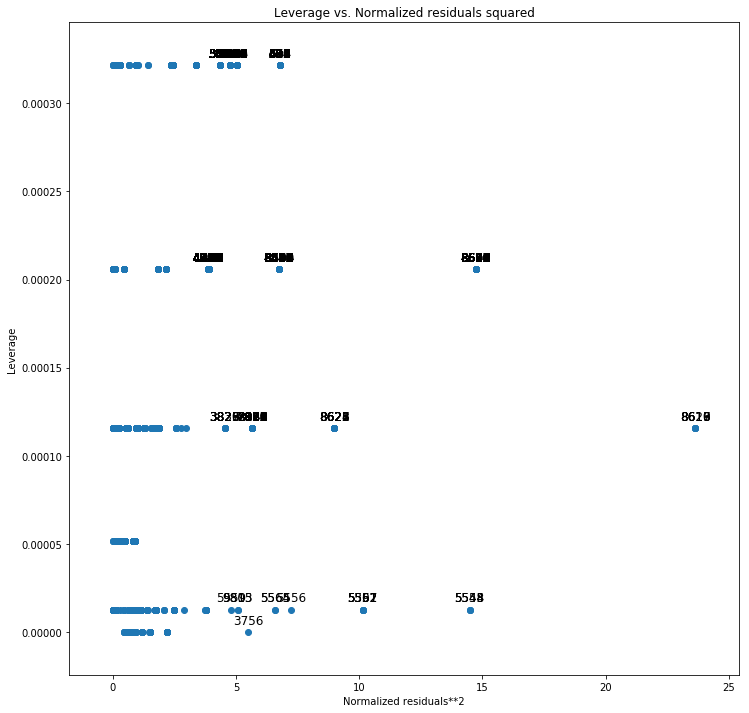

In [22]:
fig, ax = plt.subplots(figsize=(12,12))
fig = plot_leverage_resid2(results, ax = ax)
plt.show()

In [23]:
type(est2)

statsmodels.regression.linear_model.RegressionResultsWrapper

Multicollinearity

In [24]:
np.linalg.cond(est2.model.exog)

4.2024828593722132e+18

Heteroskedasticity

It is customary to check for heteroscedasticity of residuals once you build the linear regression model. The reason is, we want to check if the model thus built is unable to explain some pattern in the response variable Y, that eventually shows up in the residuals. This would result in an inefficient and unstable regression model that could yield bizarre predictions later on.

For these test the null hypothesis is that all observations have the same error variance, i.e. errors are homoscedastic. The tests differ in which kind of heteroscedasticity is considered as alternative hypothesis. They also vary in the power of the test for different types of heteroscedasticity.

Breush-Pagan test: It tests whether the variance of the errors from a regression is dependent on the values of the independent variables. In that case, heteroskedasticity is present.
If the test statistic has a p-value below an appropriate threshold (e.g. p<0.05) then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.

In [25]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(est2.resid, est2.model.exog)
lzip(name, test)

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


[('Lagrange multiplier statistic', 357453.11797230464),
 ('p-value', 0.0),
 ('f-value', 20160.172499444179),
 ('f p-value', 0.0)]

Goldfeld-Quandt test

In [26]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(est2.resid, est2.model.exog)
lzip(name, test)

[('F statistic', 0.72086422157047358), ('p-value', 0.99999999999999989)]

In [27]:
from statsmodels.graphics.regressionplots import plot_regress_exog

Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure: ‘endog versus exog’, ‘residuals versus exog’, ‘fitted versus exog’ and ‘fitted plus residual versus exog’

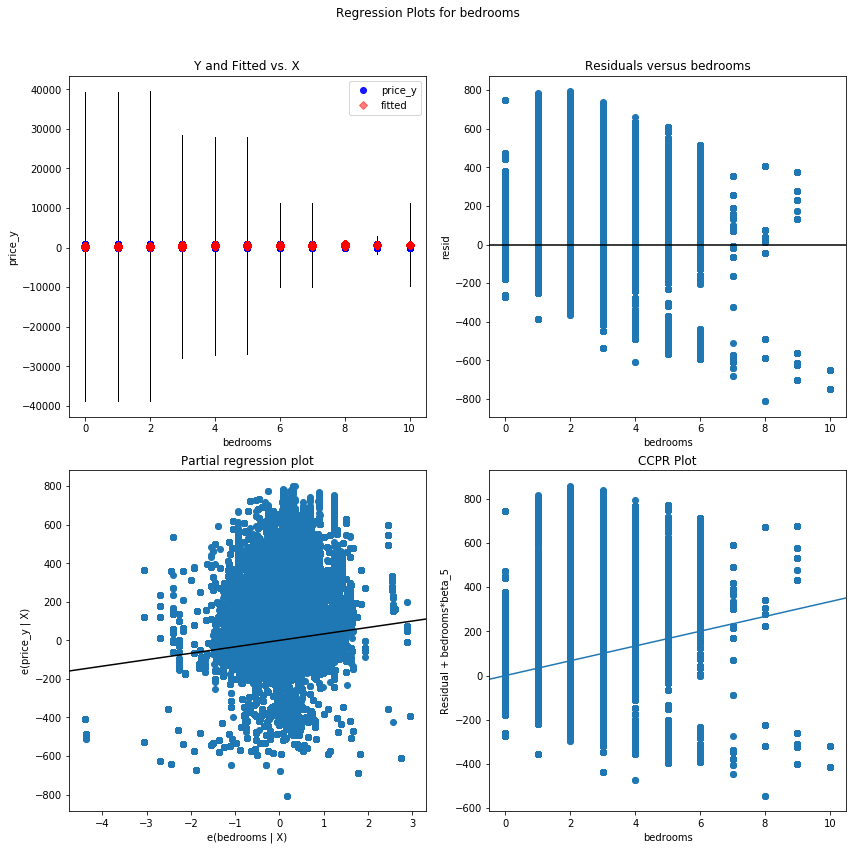

In [28]:
fig = plt.figure(figsize=(12,12))
plot_regress_exog(est2, 5, fig=fig)

In [36]:
cols_for_plot = ['accommodates','number_of_reviews','review_scores_rating','transit_variety','transitTextWordsPerc']

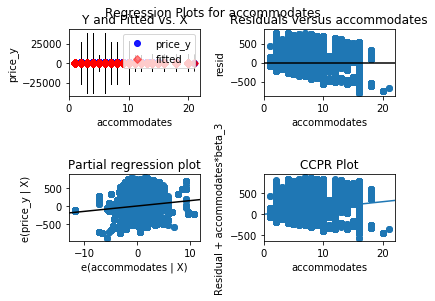

In [ ]:
#plot_regress_exog(est2, 'number_of_reviews')

In [ ]:
#plot_regress_exog(est2, 'review_scores_rating')

In [ ]:
#plot_regress_exog(est2, 'transit_variety')

In [ ]:
#plot_regress_exog(est2, 'transitTextWordsPerc')

Component-Component plus Residual (CCPR) Plots
The CCPR plot provides a way to judge the effect of one regressor on the 
response variable by taking into account the effects of the other 
independent variables. The partial residuals plot is defined as 
Residuals+BiXi    versus  Xi . The component adds  BiXi  versus 
Xi  to show where the fitted line would lie. Care should be taken if  Xi  
is highly correlated with any of the other independent variables. If this 
is the case, the variance evident in the plot will be an underestimate of 
the true variance.

Conclusion: the variables that have low variance in the top right graph and low slope on the bottom right plot are showing less heteroskedasticity (better for autoregression analysis). However, the heteroskedasticity tests show that there is a lot of heteroskedasticity, which implies a poor future prediction (Standard estimation methods are inefficient when the errors are heteroscedastic or have non-constant variance)

Linearity: Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

The basic idea of the Rainbow test is that even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the "middle" of the data. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample.

In [ ]:
"""name = ['t value', 'p value']
test = sms.linear_harvey_collier(est2)
lzip(name, test)"""

Heteroskedastic-Robust Standard Errors

In [ ]:
results2_robust = est2.get_robustcov_results()

In [ ]:
results2_robust.summary()

The same linear regression in SKLearn

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X,master['price_y'])

In [ ]:
print 'Estimated intercept coefficient: ', lm.intercept_

In [ ]:
print 'Number of coefficients: ', len(lm.coef_)

Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.

The key to understanding the coefficients is to think of them as slopes, and they’re often called slope coefficients. I’ll illustrate this in the fitted line plot below, where I’ll use a person’s height to model their weight.

In [ ]:
pd.DataFrame(zip(X.columns, lm.coef_), columns=['Features','Estimated Coefficients'])

In [ ]:
plt.scatter(master.transitTextWordsPerc, master.price_y)
plt.xlabel("Percentage of Words in Transit Description Field")
plt.ylabel("Calendar Price")
plt.title("Plotting Price and Transit Text Words Perc")
plt.show()


In [ ]:
lm.predict(X)[0:390]


#Problem: we have many calendar days for the same listings. For each listing, one price prediction is made but because
#we have many calendar days for each listing, the above outputs the same result for each cal day
#Make better representation

More Regressions

In [ ]:
from sklearn import linear_model

Lasso Lars Regression

In [ ]:
ll = linear_model.LassoLars(alpha=.1)
ll.fit(X, y)

In [ ]:
ll.coef_

In [ ]:
ll.intercept_

Bayesian Ridge Regression

In [ ]:
br = linear_model.BayesianRidge()

In [ ]:
br.fit(X,y)

In [ ]:
br.coef_

In [ ]:
br.intercept_

Stochastic Gradient Descent

In [ ]:
X_trunc = X.head(10000)

In [ ]:
y_trunc = y.head(10000)

In [ ]:
sgd = linear_model.SGDClassifier()
sgd.fit(X_trunc, y_trunc)

In [ ]:
sgd.coef_

In [ ]:
sgd.intercept_

Non Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

Plynomial Interpolation

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [ ]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

In [ ]:
len(y)

In [ ]:
X_trunc = X_trunc.head(1000)
y_trunc = y_trunc.head(1000)

In [ ]:
#X = x[:, np.newaxis]
#X_plot = x_plot[:, np.newaxis]
x_plot = np.linspace(0, 1, len(X_trunc))
x = np.linspace(0, 1, len(X_trunc))

colors = ['teal', 'yellowgreen']

lw = 2

plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw)

plt.scatter(x, y_trunc, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_trunc, y_trunc)
    y_plot = model.predict(X_trunc)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

More Nonlinear Regressions (These will freeze)

In [ ]:
"""poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)"""

In [ ]:
"""poly = PolynomialFeatures(degree=4)
poly.fit_transform(X)"""

Outputting list of features that are deemed to be statistically significant by this process

In [ ]:
for i in pd.DataFrame(zip(X.columns, lm.coef_), columns=['features','estimatedCoefficients']):
    print i

New Regressions 4/10/18

Going to take the average price for each listing time series and just use that to do a regression.
List of ideas/topics: 

linear and polynomial muultivariate regressions, 
imputation methods, feature scaling, feature standrdization, 
one hot encoding, 
OLS vs SGD for optimization, 
correlation matrices, 
creation of new variables, 
performance metrics and model comparisons, 
interaction between variables, 
multicollinearity, 
how to encode lat-long in regression,
potentially apply PCA,
text driven feature engineering

Preparing the dataset first: taking the avg of each listing price time series

In [2]:
cal = pd.read_csv('Datasources/inside_airbnb/calendar.csv')

In [3]:
cal.columns

Index([u'listing_id', u'date', u'available', u'price'], dtype='object')

In [4]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
cal = cal.infer_objects()

In [6]:
cal['price'] = cal['price'].astype(str).map(lambda x: x.lstrip('$'))
cal['price'] = cal['price'].apply(pd.to_numeric, errors='coerce')
cal['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [7]:
c = cal.loc[cal.available!='f']
c = c[['listing_id','date','price']]

In [8]:
c.isnull().sum()

listing_id        0
date              0
price         31906
dtype: int64

In [9]:
len(cal['listing_id'].unique())

6608

In [10]:
mean_price = c.groupby(by='listing_id')['price'].mean()

In [11]:
mean_price = pd.DataFrame(mean_price)

In [12]:
mean_price = mean_price.reset_index()

In [13]:
mean_price.isnull().sum()

listing_id     0
price         92
dtype: int64

In [14]:
mean_price['price'] = mean_price['price'].fillna(mean_price['price'].mean())

In [15]:
mean_price.columns

Index([u'listing_id', u'price'], dtype='object')

In [16]:
listings = pd.read_csv('Datasources/inside_airbnb/listings.csv')

In [258]:
master = listings.merge(mean_price, how='inner', left_on='id', right_on='listing_id')

In [259]:
len(master)

5922

Now with master we have a price_x which is the original base price provided by the listing host, and the price_y which is the mean price for each listing we calculated above

In [260]:
target = master['price_y']

In [261]:
master = master.drop(columns='price_y')

Multivariate linear regression

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [92]:
#master = sm.add_constant(master)

In [93]:
X = master.select_dtypes(include=['float64', 'int64'])

In [94]:
X.isnull().sum()

id                                   0
scrape_id                            0
host_id                              0
host_listings_count                  0
host_total_listings_count            0
neighbourhood_group_cleansed      5922
zipcode                             99
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           10
bedrooms                             3
beds                                 4
square_feet                       5822
guests_included                      0
minimum_nights                       0
maximum_nights                       0
has_availability                  5922
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating              1737
review_scores_accuracy            1748
review_scores_cleanliness

In [95]:
#Dropping columns with too many null values

In [96]:
X = X.drop(columns=['neighbourhood_group_cleansed','square_feet','has_availability','license'])

In [97]:
#replacing nulls in columns that have some nulls 
X = X.fillna(value=X.mean())

Feature Engineering and Column Removal

In [98]:
#First removing columns that should always be removed:
X = X.drop(columns=['id','listing_id','host_id','scrape_id'])

In [99]:
X.dtypes

host_listings_count                 int64
host_total_listings_count           int64
zipcode                           float64
latitude                          float64
longitude                         float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               

Now One Hot Encoding Categorical Features

In [100]:
linear_regression = sm.OLS(target,X)

In [101]:
fitted_model = linear_regression.fit()

In [102]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                price_y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1088.
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:41:19   Log-Likelihood:                -36203.
No. Observations:                5922   AIC:                         7.246e+04
Df Residuals:                    5897   BIC:                         7.262e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_listings_count                0.0321      0.014      2.221      0.026       0.004       0.060
host_total_listings_count          0.0321      0.014      2.221      0.026       0.004       0.060
zipcode                         7.571e-05      0.002      0.048      0.962      -0.003       0.003
latitude                        -138.1841     24.231     -5.703      0.000    -185.686     -90.682
longitude                        -37.3689      6.822     -5.478      0.000     -50.742     -23.995
accommodates                      28.6500      1.140     25.122      0.000      26.414      30.886
bathrooms                         15.5053      2.623      5.911      0.000      10.363      20.648
bedrooms                          29.6430      2.624     11.297      0.000      24.499      34.787
beds                              -6.5344      1.643     -3.978      0.000      -9.755      -3.314
guests_included                    1.8248      0.894      2.041      0.041       0.072       3.577
minimum_nights                    -0.2768      0.257     -1.075      0.282      -0.782       0.228
maximum_nights                 -3.748e-05      0.000     -0.345      0.730      -0.000       0.000
availability_30                    1.4479      0.337      4.302      0.000       0.788       2.108
availability_60                    0.5286      0.314      1.684      0.092      -0.087       1.144
availability_90                   -0.7397      0.172     -4.307      0.000      -1.076      -0.403
availability_365                  -0.0147      0.014     -1.069      0.285      -0.042       0.012
number_of_reviews                 -0.2540      0.056     -4.575      0.000      -0.363      -0.145
review_scores_rating               0.4084      0.416      0.983      0.326      -0.406       1.223
review_scores_accuracy             6.9171      3.171      2.181      0.029       0.701      13.133
review_scores_cleanliness          8.8139      2.702      3.262      0.001       3.516      14.112
review_scores_checkin             -7.6598      3.947     -1.941      0.052     -15.397       0.077
review_scores_communication        4.2007      3.848      1.092      0.275      -3.343      11.745
review_scores_location            14.5753      2.873      5.073      0.000       8.942      20.208
review_scores_value              -12.7070      3.285     -3.868      0.000     -19.147      -6.267
calculated_host_listings_count     0.7456      0.109      6.858      0.000       0.532       0.959
reviews_per_month                 -3.9724      1.119     -3.551      0.000      -6.166      -1.779
==============================================================================
Omnibus:                     1370.717   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [103]:
fitted_model.params

host_listings_count                 0.032082
host_total_listings_count           0.032082
zipcode                             0.000076
latitude                         -138.184058
longitude                         -37.368880
accommodates                       28.650001
bathrooms                          15.505251
bedrooms                           29.642969
beds                               -6.534358
guests_included                     1.824833
minimum_nights                     -0.276841
maximum_nights                     -0.000037
availability_30                     1.447851
availability_60                     0.528602
availability_90                    -0.739654
availability_365                   -0.014720
number_of_reviews                  -0.253985
review_scores_rating                0.408405
review_scores_accuracy              6.917058
review_scores_cleanliness           8.813912
review_scores_checkin              -7.659830
review_scores_communication         4.200723
review_sco

In [104]:
fitted_model.predict(X).head(3)

0    133.536339
1    136.599461
2    185.820684
dtype: float64

In [105]:
target.head(3)

0     49.0
1     59.0
2    120.0
Name: price_y, dtype: float64

In [106]:
mean_expected_value = target.mean()

In [107]:
Squared_errors = pd.Series(mean_expected_value - target)**2

In [108]:
SSE = sum(Squared_errors)

In [109]:
SSE

160180978.32987943

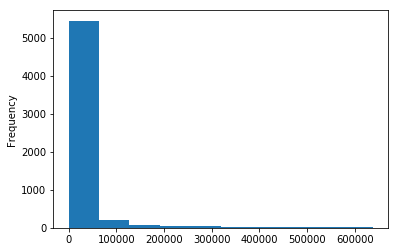

In [110]:
density_plot = Squared_errors.plot('hist')

In [111]:
plt.figure()
density_plot
plt.show()

In [112]:
X.corr()

,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_listings_count,1.000000,1.000000,-0.000775,0.030935,-0.114995,0.164162,0.134966,0.132602,0.109602,-0.083983,...,-0.098529,-0.058365,-0.038761,-0.026109,-0.061389,-0.065520,-0.005768,-0.066629,0.500937,-0.070702
host_total_listings_count,1.000000,1.000000,-0.000775,0.030935,-0.114995,0.164162,0.134966,0.132602,0.109602,-0.083983,...,-0.098529,-0.058365,-0.038761,-0.026109,-0.061389,-0.065520,-0.005768,-0.066629,0.500937,-0.070702
zipcode,-0.000775,-0.000775,1.000000,0.052350,-0.015547,0.007011,0.017518,0.002359,0.006237,0.006372,...,0.007288,0.014443,0.012079,0.008474,0.019817,0.019349,-0.009328,0.008856,-0.002434,0.012512
latitude,0.030935,0.030935,0.052350,1.000000,-0.366843,0.086380,0.171017,0.155283,0.083020,0.011080,...,-0.069860,0.027917,0.011242,0.024635,0.007360,0.007039,0.078988,0.007108,0.113111,-0.082374
longitude,-0.114995,-0.114995,-0.015547,-0.366843,1.000000,-0.255794,-0.190357,-0.215242,-0.206105,-0.027661,...,0.030665,0.059921,0.069490,0.057266,0.052262,0.064387,-0.132744,0.100206,-0.289360,0.066751
accommodates,0.164162,0.164162,0.007011,0.086380,-0.255794,1.000000,0.701194,0.836426,0.852910,0.397709,...,-0.122796,-0.074716,-0.091350,-0.059334,-0.071133,-0.094320,-0.021794,-0.108718,0.275507,-0.123837
bathrooms,0.134966,0.134966,0.017518,0.171017,-0.190357,0.701194,1.000000,0.768125,0.677915,0.258084,...,-0.137077,-0.031469,-0.044889,-0.042821,-0.041611,-0.057974,-0.002542,-0.056755,0.236680,-0.152972
bedrooms,0.132602,0.132602,0.002359,0.155283,-0.215242,0.836426,0.768125,1.000000,0.791530,0.351976,...,-0.149840,-0.049791,-0.068921,-0.052666,-0.041358,-0.062914,-0.011820,-0.076263,0.256847,-0.169442
beds,0.109602,0.109602,0.006237,0.083020,-0.206105,0.852910,0.677915,0.791530,1.000000,0.372617,...,-0.100397,-0.068199,-0.085838,-0.056763,-0.048396,-0.067253,-0.015831,-0.086855,0.177954,-0.116552
guests_included,-0.083983,-0.083983,0.006372,0.011080,-0.027661,0.397709,0.258084,0.351976,0.372617,1.000000,...,0.039417,-0.005114,-0.014010,-0.013868,0.004756,-0.003543,-0.029003,-0.008008,-0.114025,-0.019261


In [113]:
import seaborn as sb

In [114]:
%matplotlib inline

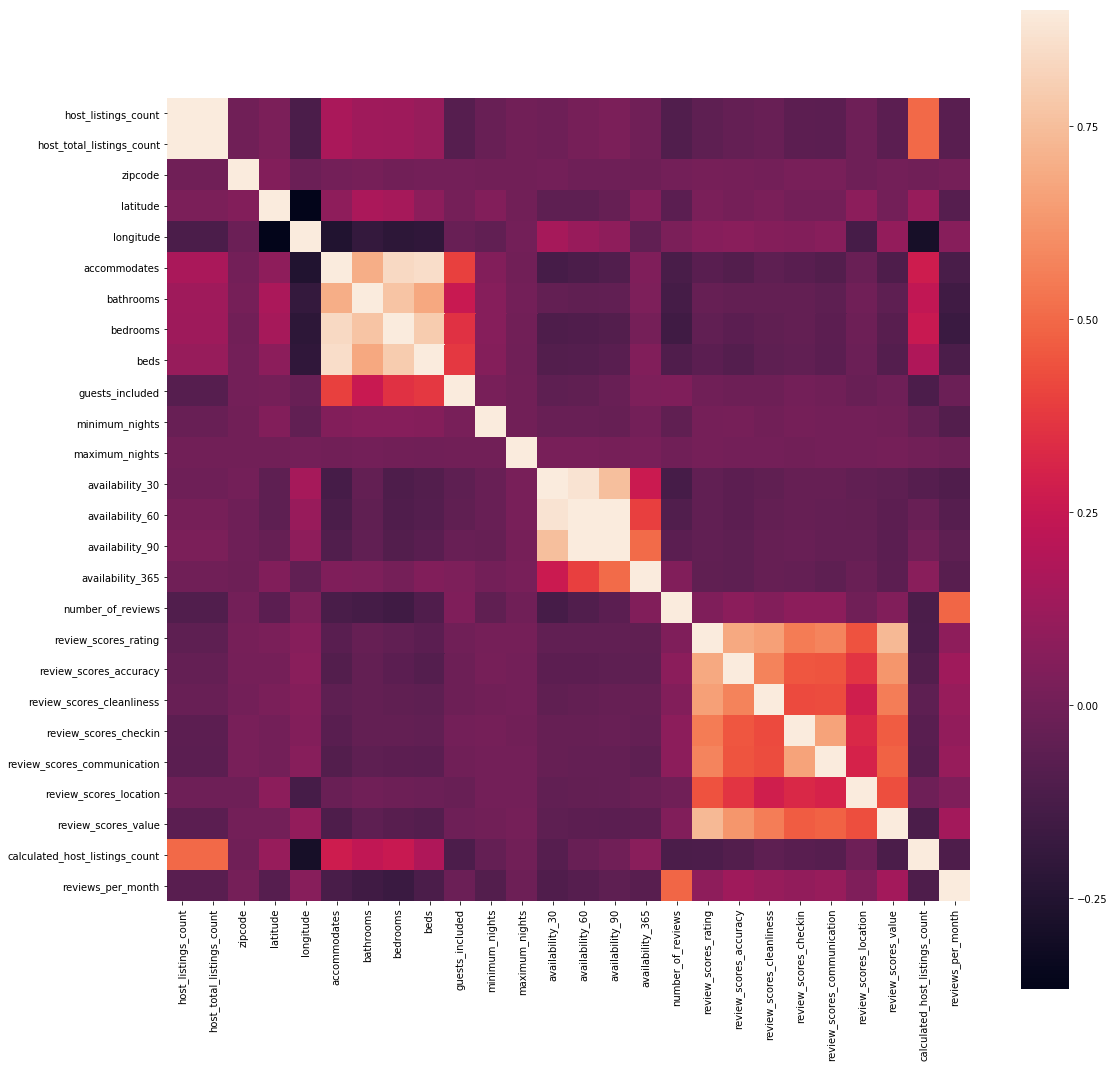

In [115]:
f, ax = plt.subplots(figsize=(18,18))
sb.heatmap(X.corr(), vmax=.9, square=True)

Eigenvector Analysis

In [116]:
corr = np.corrcoef(X, rowvar=0)

In [117]:
pd.DataFrame(corr)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000000,1.000000,-0.000775,0.030935,-0.114995,0.164162,0.134966,0.132602,0.109602,-0.083983,...,-0.098529,-0.058365,-0.038761,-0.026109,-0.061389,-0.065520,-0.005768,-0.066629,0.500937,-0.070702
1,1.000000,1.000000,-0.000775,0.030935,-0.114995,0.164162,0.134966,0.132602,0.109602,-0.083983,...,-0.098529,-0.058365,-0.038761,-0.026109,-0.061389,-0.065520,-0.005768,-0.066629,0.500937,-0.070702
2,-0.000775,-0.000775,1.000000,0.052350,-0.015547,0.007011,0.017518,0.002359,0.006237,0.006372,...,0.007288,0.014443,0.012079,0.008474,0.019817,0.019349,-0.009328,0.008856,-0.002434,0.012512
3,0.030935,0.030935,0.052350,1.000000,-0.366843,0.086380,0.171017,0.155283,0.083020,0.011080,...,-0.069860,0.027917,0.011242,0.024635,0.007360,0.007039,0.078988,0.007108,0.113111,-0.082374
4,-0.114995,-0.114995,-0.015547,-0.366843,1.000000,-0.255794,-0.190357,-0.215242,-0.206105,-0.027661,...,0.030665,0.059921,0.069490,0.057266,0.052262,0.064387,-0.132744,0.100206,-0.289360,0.066751
5,0.164162,0.164162,0.007011,0.086380,-0.255794,1.000000,0.701194,0.836426,0.852910,0.397709,...,-0.122796,-0.074716,-0.091350,-0.059334,-0.071133,-0.094320,-0.021794,-0.108718,0.275507,-0.123837
6,0.134966,0.134966,0.017518,0.171017,-0.190357,0.701194,1.000000,0.768125,0.677915,0.258084,...,-0.137077,-0.031469,-0.044889,-0.042821,-0.041611,-0.057974,-0.002542,-0.056755,0.236680,-0.152972
7,0.132602,0.132602,0.002359,0.155283,-0.215242,0.836426,0.768125,1.000000,0.791530,0.351976,...,-0.149840,-0.049791,-0.068921,-0.052666,-0.041358,-0.062914,-0.011820,-0.076263,0.256847,-0.169442
8,0.109602,0.109602,0.006237,0.083020,-0.206105,0.852910,0.677915,0.791530,1.000000,0.372617,...,-0.100397,-0.068199,-0.085838,-0.056763,-0.048396,-0.067253,-0.015831,-0.086855,0.177954,-0.116552
9,-0.083983,-0.083983,0.006372,0.011080,-0.027661,0.397709,0.258084,0.351976,0.372617,1.000000,...,0.039417,-0.005114,-0.014010,-0.013868,0.004756,-0.003543,-0.029003,-0.008008,-0.114025,-0.019261


In [118]:
pd.DataFrame(corr).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [119]:
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [122]:
list(eigenvalues)

[4.4643457157435371,
 3.7459405690730616,
 2.8317249761058036,
 2.2483475174261947,
 1.4460659549994763,
 1.3176248014976482,
 0.97400937266107357,
 1.0074575850037426,
 0.99932733724655076,
 0.817858773348066,
 0.79413528697954794,
 0.78329613229580608,
 0.75881732108344579,
 -1.7539383948466897e-17,
 0.035785217582345416,
 0.6073711860674238,
 0.12571729268575965,
 0.17666467253661888,
 0.20349287964032273,
 0.2280238866477666,
 0.49715000021488798,
 0.47800396056710731,
 0.43152008933874914,
 0.37216406762169263,
 0.32444530791034232,
 0.33071009572301896]

In [124]:
eigenvectors

array([[  1.45860601e-01,   9.55526888e-02,  -1.28978052e-01,
          5.56303377e-01,   1.63661885e-01,  -1.18246805e-01,
          9.78902085e-02,   4.03306497e-02,   7.64090392e-03,
         -4.58142923e-02,  -8.83016167e-02,  -1.86873526e-01,
          2.47783002e-02,   7.07106781e-01,   5.26993367e-03,
         -1.14839722e-01,   6.49156316e-03,   1.60034897e-02,
          2.60364953e-03,  -4.76387977e-03,  -1.58121170e-01,
          8.30641528e-02,  -8.23354485e-03,   7.03085339e-03,
         -2.12465120e-02,   2.13704369e-03],
       [  1.45860601e-01,   9.55526888e-02,  -1.28978052e-01,
          5.56303377e-01,   1.63661885e-01,  -1.18246805e-01,
          9.78902085e-02,   4.03306497e-02,   7.64090392e-03,
         -4.58142923e-02,  -8.83016167e-02,  -1.86873526e-01,
          2.47783002e-02,  -7.07106781e-01,   5.26993367e-03,
         -1.14839722e-01,   6.49156316e-03,   1.60034897e-02,
          2.60364953e-03,  -4.76387977e-03,  -1.58121170e-01,
          8.30641528e-02,

Now using SGD

In [129]:
#WIP

In [125]:
#First, scale and standardize data

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
st = StandardScaler()

In [128]:
Xst = st.fit_transform(X)

Feature Importance

In [134]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

In [133]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [135]:
standardization = StandardScaler()

In [136]:
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

In [138]:
linear_regression.fit(X,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
for coef, var in sorted(zip(map(abs, linear_regression.coef_), X.columns[:-1]),reverse=True):
    print ("%6.3f %s" % (coef,var)) 

399.080 longitude
169.226 latitude
30.491 bedrooms
27.150 accommodates
15.320 bathrooms
 9.268 review_scores_cleanliness
 8.806 review_scores_value
 7.862 review_scores_accuracy
 6.941 review_scores_location
 6.708 beds
 6.679 review_scores_checkin
 5.075 review_scores_communication
 2.136 guests_included
 1.758 availability_30
 0.744 availability_90
 0.524 availability_60
 0.431 calculated_host_listings_count
 0.428 minimum_nights
 0.349 review_scores_rating
 0.271 number_of_reviews
 0.040 host_listings_count
 0.040 host_total_listings_count
 0.022 availability_365
 0.001 zipcode
 0.000 maximum_nights


Comparing Models:

In [144]:
#Baseline:
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
def r2_est(X,y):
    return r2_score(y, linear_regression.fit(X,y).predict(X))

In [147]:
"Baseline Model R2: %f" %r2_est(X,target)

'Baseline Model R2: 0.573471'

In [148]:
r2_impact = list()

In [150]:
len(X)

5922

In [169]:
baseline = r2_est(X,target)

In [151]:
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,target)-(r2_est(X.values[:,selection],target)),X.columns[j])))

In [154]:
for imp, var in sorted(r2_impact, reverse=True):
    print("%6.3f %s" %(imp, var))

 0.042 accommodates
 0.017 longitude
 0.010 bedrooms
 0.004 latitude
 0.003 bathrooms
 0.002 availability_30
 0.002 number_of_reviews
 0.001 availability_90
 0.001 beds
 0.001 calculated_host_listings_count
 0.001 review_scores_cleanliness
 0.001 reviews_per_month
 0.001 review_scores_value
 0.000 review_scores_accuracy
 0.000 guests_included
 0.000 review_scores_location
 0.000 review_scores_checkin
 0.000 availability_60
 0.000 minimum_nights
 0.000 availability_365
 0.000 review_scores_communication
 0.000 review_scores_rating
 0.000 zipcode
 0.000 maximum_nights
 0.000 host_total_listings_count
 0.000 host_listings_count


Interaction Variables

In [156]:
from sklearn.preprocessing import PolynomialFeatures
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [157]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

In [161]:
create_interactions.powers_

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [178]:
#Now calculating the interactions:
for k, effect in enumerate(create_interactions.powers_[(main_effects):]):
    A, B = X.columns[effect==1]
    increment = r2_est(Xi[:,list(range(0,main_effects))+[main_effects+k]],target) - baseline
    if increment > 0.005:
        print ("Interaction: var %8s and var %8s R2: %5.3f" %(A,B,increment))
        

Interaction: var host_listings_count and var accommodates R2: 0.006
Interaction: var host_listings_count and var bathrooms R2: 0.011
Interaction: var host_total_listings_count and var accommodates R2: 0.006
Interaction: var host_total_listings_count and var bathrooms R2: 0.011
Interaction: var longitude and var calculated_host_listings_count R2: 0.005
Interaction: var accommodates and var bathrooms R2: 0.008
Interaction: var accommodates and var bedrooms R2: 0.008
Interaction: var accommodates and var     beds R2: 0.005
Interaction: var bathrooms and var bedrooms R2: 0.010
Interaction: var bathrooms and var calculated_host_listings_count R2: 0.009


As a result we create new variables in X based on the highest R2 increment above (e.g. host_total_listings_count * bathrooms)
And then we rerun the r2_est method to see how this impacts the prediction

In [179]:
X['hst_tot_list_count*bathrooms'] = X['host_total_listings_count'] * X['bathrooms']

In [184]:
print("new R2: ", r2_est(X,target))
print("baseline R2: ", baseline)

new R2:  0.584410437817
baseline R2:  0.573471146546


Label Encoding and Binarizing Certain Variables

In [ ]:
#variables to parse (already are numeric just need to convert from object dtype):
#host_response_rate, host_acceptance_rate, extra_people, weekly_price, monthly_price, security_deposit, cleaning_fee
#

In [ ]:
#variables containing string text that can be one hot encoded:
#host_verifications

In [ ]:
#simply convert to numeric:
#calculated_host_listings_count, reviews_per_month

In [218]:
master.select_dtypes(exclude=['int64, float64']).columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

In [190]:
master.cancellation_policy.unique()

array(['moderate', 'strict', 'flexible', 'super_strict_60',
       'super_strict_30', 'no_refunds'], dtype=object)

In [191]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

Encoding Variables

In [192]:
label_enc = LabelEncoder()

In [195]:
X['policy_enc'] = label_enc.fit_transform(master.cancellation_policy)

In [207]:
master['host_response_time'] = master['host_response_time'].astype(str)

In [208]:
X['host_resp_time_enc'] = label_enc.fit_transform(master.host_response_time)

In [221]:
master['calendar_updated'] = master['calendar_updated'].astype(str)

In [244]:
X['calendar_updated_enc'] = label_enc.fit_transform(master.calendar_updated)

In [235]:
master['bed_type'] = master['bed_type'].astype(str)

In [245]:
X['bed_type_enc'] = label_enc.fit_transform(master.bed_type)

In [246]:
master['jurisdiction_names'] = master['jurisdiction_names'].astype(str)

In [247]:
X['jurisdiction_names_enc'] = label_enc.fit_transform(master.jurisdiction_names)

Binarizing Variables

In [209]:
label_bin = LabelBinarizer()

In [210]:
X['host_is_superhost'] = label_bin.fit_transform(master.host_is_superhost)

In [226]:
X['is_location_exact'] = label_bin.fit_transform(master.is_location_exact)

In [230]:
X['host_profile_pic'] = label_bin.fit_transform(master.host_has_profile_pic)

In [231]:
X['host_identity_verified'] = label_bin.fit_transform(master.host_identity_verified)

In [240]:
X['instant_bookable'] = label_bin.fit_transform(master.instant_bookable)

In [250]:
X['require_guest_profile_picture'] = label_bin.fit_transform(master.require_guest_profile_picture)

In [251]:
X['require_guest_phone_verification'] = label_bin.fit_transform(master.require_guest_phone_verification)

In [252]:
master.calculated_host_listings_count.unique()

array([ 2,  1,  3,  5,  4, 18,  7, 19, 12,  6, 14, 11, 10, 21, 40, 81, 23,
       22,  8,  9, 90, 61, 54, 13, 30, 20, 28, 24])

In [249]:
master.require_guest_profile_picture.isnull().sum()

0

Parsing numeric variables with regex

In [255]:
#host_response_rate, host_acceptance_rate, extra_people, weekly_price, monthly_price, security_deposit, cleaning_fee
#

In [262]:
ms = master.copy()

In [265]:
ms['host_response_rate'] = ms['host_response_rate'].astype(str).map(lambda x: x.lstrip('%'))

In [268]:
for i in ms['host_response_rate'].head(5):
    print(type(i))

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


In [ ]:
master['host_response_rate'] = master['host_response_rate'].apply(pd.to_numeric, errors='coerce')
master['host_response_rate'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [266]:
ms['host_response_rate']

0        97%
1        80%
2       100%
3       100%
4       100%
5       100%
6       100%
7       100%
8       100%
9        nan
10      100%
11      100%
12      100%
13      100%
14      100%
15      100%
16      100%
17      100%
18      100%
19      100%
20      100%
21       73%
22      100%
23      100%
24      100%
25      100%
26       73%
27      100%
28       78%
29      100%
        ... 
5892     nan
5893    100%
5894    100%
5895     nan
5896    100%
5897    100%
5898    100%
5899    100%
5900    100%
5901    100%
5902     nan
5903    100%
5904    100%
5905    100%
5906    100%
5907    100%
5908    100%
5909    100%
5910     nan
5911     nan
5912    100%
5913    100%
5914    100%
5915    100%
5916     nan
5917    100%
5918    100%
5919    100%
5920    100%
5921    100%
Name: host_response_rate, Length: 5922, dtype: object